## Euler's method

We look at numerically solving differential equations. Most scientific software packages already include a wide variety of numerical integrators. Here we'll write our own simple version and compare it to the built in solutions.

Here's the built in solution using the ode integrator already available.

In [19]:
%matplotlib inline
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def input(t):
    f = np.cos(t)
    return f

def msd(state, t, m, c, k):
    x, xd = state
    pos_dot = xd
    vel_dot = 1/m*(input(t) - c*xd - k*x)
    state_dot = [pos_dot, vel_dot]
    return state_dot

num_steps = 100
tf = 10
t = np.linspace(0,tf,num_steps)
x0 = [0,0]

m = 2
c = 2
k = 1

sol_ode = odeint(msd, x0, t, args=(m, c, k))



Now we implement Euler's method

In [20]:
sol_euler = np.zeros((num_steps,2))
delta_t = tf/(num_steps-1)
sol_euler[0,:] = x0

for ii in range(num_steps-1):
    sol_euler[ii+1,0] = sol_euler[ii,0] + sol_euler[ii,1]*delta_t
    
    a = 1/m*(input(t[ii])-c*sol_euler[ii,1] - k*sol_euler[ii,0])
    
    sol_euler[ii+1,1] = sol_euler[ii,1]+a*delta_t
    

Now lets print the solutions

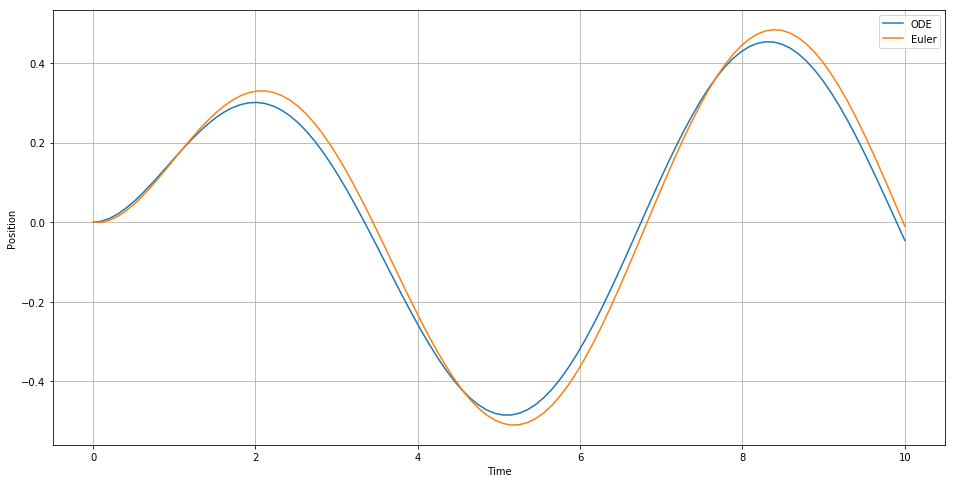

In [21]:
plt.figure(figsize=(16,8))
plt.plot(t,sol_ode[:,0],label='ODE')
plt.plot(t,sol_euler[:,0],label='Euler')
plt.xlabel('Time')
plt.ylabel('Position')
plt.grid(True)
plt.legend()
plt.show()